# **Telecom Churn Analysis**
---

# Import Library

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

**Data Source**

- Dataset title: Telco Customer Churn
- Dataset source URL: https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv
- Dataset source description (Github repository managed by IBM): https://github.com/IBM/telco-customer-churn-on-icp4d

In [3]:
# Read data
data = pd.read_csv('https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv')

# Check the sample
data.sample(n=5, random_state=100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4880,1215-EXRMO,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65,No
1541,2429-AYKKO,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.1,No
1289,9968-FFVVH,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35,No
5745,3580-GICBM,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.2,No
4873,2320-YKQBO,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95,No


# 0. Data Understanding

## 0.1. Features Definition

| Feature Name              | Feature Description        |
|---------------------------|----------------------------|
| customerID                | A unique ID that identifies each customer.                   |
| gender                    | The customer’s gender: Male, Female.                     |
| SeniorCitizen             | Indicates if the customer is 65 or older.                      |
| Partner                   | Indicates if customer has a partner or not.                        |
| Dependents                | Indicates if customer lives with any dependents or not.          |
| tenure                    | Number of months the customer has stayed with the company.                |
| PhoneService              | indicates if customer has a phone service or not.                        |
| MultipleLines             | Whether the customer has multiple lines or not.                        |
| InternetService           | Customer’s internet service provider.                   |
| OnlineSecurity            | Whether the customer has online security or not.                        |
| OnlineBackup              | Indicates if the customer subscribes to an additional online backup service provided by the company.               |
| DeviceProtection          | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company.                |
| TechSupport               | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times.                      |
| StreamingTV               | Indicates if the customer uses their Internet service to stream television programing from a third party provider.                   |
| StreamingMovies           | Indicates if the customer uses their Internet service to stream movies from a third party provider.                   |
| Contract                  | Indicates the customer’s current contract type.                       |
| PaperlessBilling          | Indicates if the customer has chosen paperless billing.                    |
| PaymentMethod             | Indicates how the customer pays their bill.                       |
| MonthlyCharges            | Indicates the customer’s current total monthly charge for all their services from the company.                         |
| TotalCharges              | Indicates the customer’s total charges, calculated to the end of the quarter specified above.                   |
| Churn                     | Indicates if customer stop using company's service.                    |

## 0.2. Dimensions of the DataFrame

In [4]:
data.shape

(7043, 21)

In [5]:
print('This dataset has data dimensions:')
print('Number of rows: {}'.format(data.shape[0]))
print('Number of cols: {}'.format(data.shape[1]))

This dataset has data dimensions:
Number of rows: 7043
Number of cols: 21


## 0.3. Data Types of the Features

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Statistics for the columns (features)
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


- The `customerID` column can be dropped.
- The `tenure` column between 0 (indicating new customers) and 6 years (72 months).
- The `MonthlyCharges` column between 18.25 and 118.75.
- We need to convert the `TotalCharges` column from an object to a numeric data type.

In [8]:
data = data.drop('customerID', axis=1)

In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [10]:
data.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


## 0.4. Detect Missing Values

In [11]:
# Check the features that have missing values
print(data.isna().values.any())
data.isna().sum()

True


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Handle missing values
from sklearn.impute import SimpleImputer

# Find the column number for TotalCharges (starting at 0).
total_charges_idx = data.columns.get_loc('TotalCharges')
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

data.iloc[:, total_charges_idx] = pd.Series(imputer.fit_transform(data.iloc[:, total_charges_idx].values.reshape(-1, 1)).flatten())

In [13]:
# Confirm that all NaN values have been addressed
print(data.isna().values.any())
data.isna().sum()

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 0.5. Detect Duplicate Values

In [14]:
# Check the features that have duplicate values
print(data.duplicated().any())
data.duplicated().sum()

True


22

- Even though there are detected duplicate data, this dataset is considered unique.

## 0.6. Number of Unique Classes

In [15]:
# Count number of unique class
uniques = data.nunique().sort_values(ascending = False)
uniques

TotalCharges        6531
MonthlyCharges      1585
tenure                73
PaymentMethod          4
DeviceProtection       3
Contract               3
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
TechSupport            3
StreamingTV            3
StreamingMovies        3
PaperlessBilling       2
gender                 2
SeniorCitizen          2
PhoneService           2
Dependents             2
Partner                2
Churn                  2
dtype: int64

# 1. Exploratory Data Analysis (EDA)

# 1.0. Descriptive Statistics

In [16]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
num = data.select_dtypes(exclude = ['object'])
cat = data.select_dtypes(include = ['object'])

## 1.0.1. Numerical Features

In [18]:
num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [19]:
num.describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95]).T

,count,mean,std,min,25%,50%,75%,90%,95%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00,1.000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,69.00,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,102.60,107.400,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,5973.69,6921.025,8684.80


In [20]:
num.describe().loc[['mean', '50%']].T

,mean,50%
SeniorCitizen,0.162147,0.00
tenure,32.371149,29.00
MonthlyCharges,64.761692,70.35
TotalCharges,2283.300441,1400.55


## 1.0.2. Categorical Features

In [21]:
cat.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [22]:
cat.describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [23]:
data['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

In [24]:
data['InternetService'].value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

In [25]:
data['Contract'].value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [26]:
data['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

# 1.1. Data Visualization

In [27]:
data_num = num.columns
data_cat = cat.columns

In [28]:
len(data_num)

4

In [29]:
len(data_cat)

16

## 1.1.1. Univariate Analysis

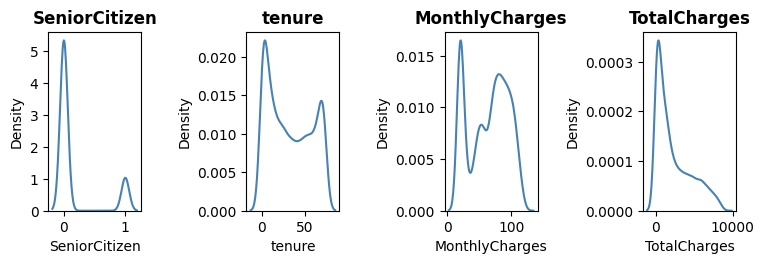

In [30]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 3

for i in range(0, len(data_num)):
    plt.subplot(1, 4, i + 1)
    sns.kdeplot(x=data[data_num[i]], color='steelblue')
    plt.xlabel(data_num[i])
    plt.title(data_num[i],
              fontsize=12,
              fontweight='bold')
    plt.tight_layout(pad=2)

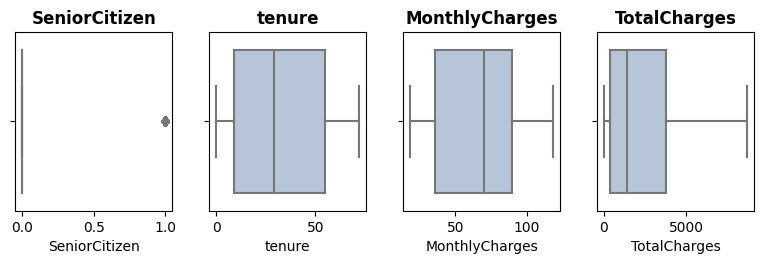

In [31]:
for i in range(0, len(data_num)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x=data[data_num[i]],
                color='lightsteelblue',
                orient='h')
    plt.title(data_num[i],
              fontsize=12,
              fontweight='bold')
    plt.tight_layout(pad=2)

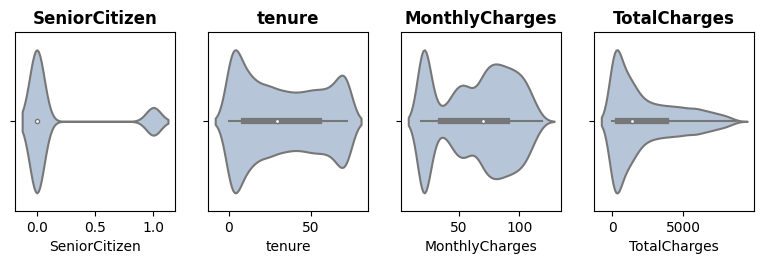

In [32]:
for i in range(0, len(data_num)):
    plt.subplot(1, 4, i + 1)
    sns.violinplot(x=data[data_num[i]],
                   color='lightsteelblue',
                   orient='h')
    plt.title(data_num[i],
              fontsize=12,
              fontweight='bold')
    plt.tight_layout(pad=2)

## 1.1.2. Multivariate Analysis

### 1.1.2.1. Distribusi Data

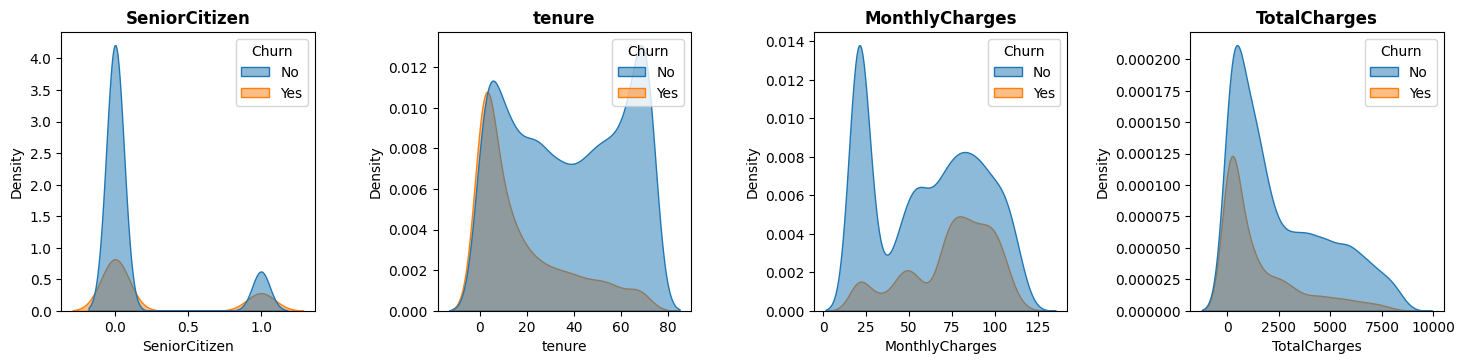

In [33]:
rcParams['figure.figsize'] = 15, 4

for i in range(0, len(data_num)):
    plt.subplot(1, 4, i + 1)
    sns.kdeplot(x=data[data_num[i]], data=data, hue='Churn', color='steelblue', fill=True, alpha=0.5)
    plt.xlabel(data_num[i])
    plt.title(data_num[i], fontsize=12, fontweight='bold')
    plt.tight_layout(pad=2)
plt.show()

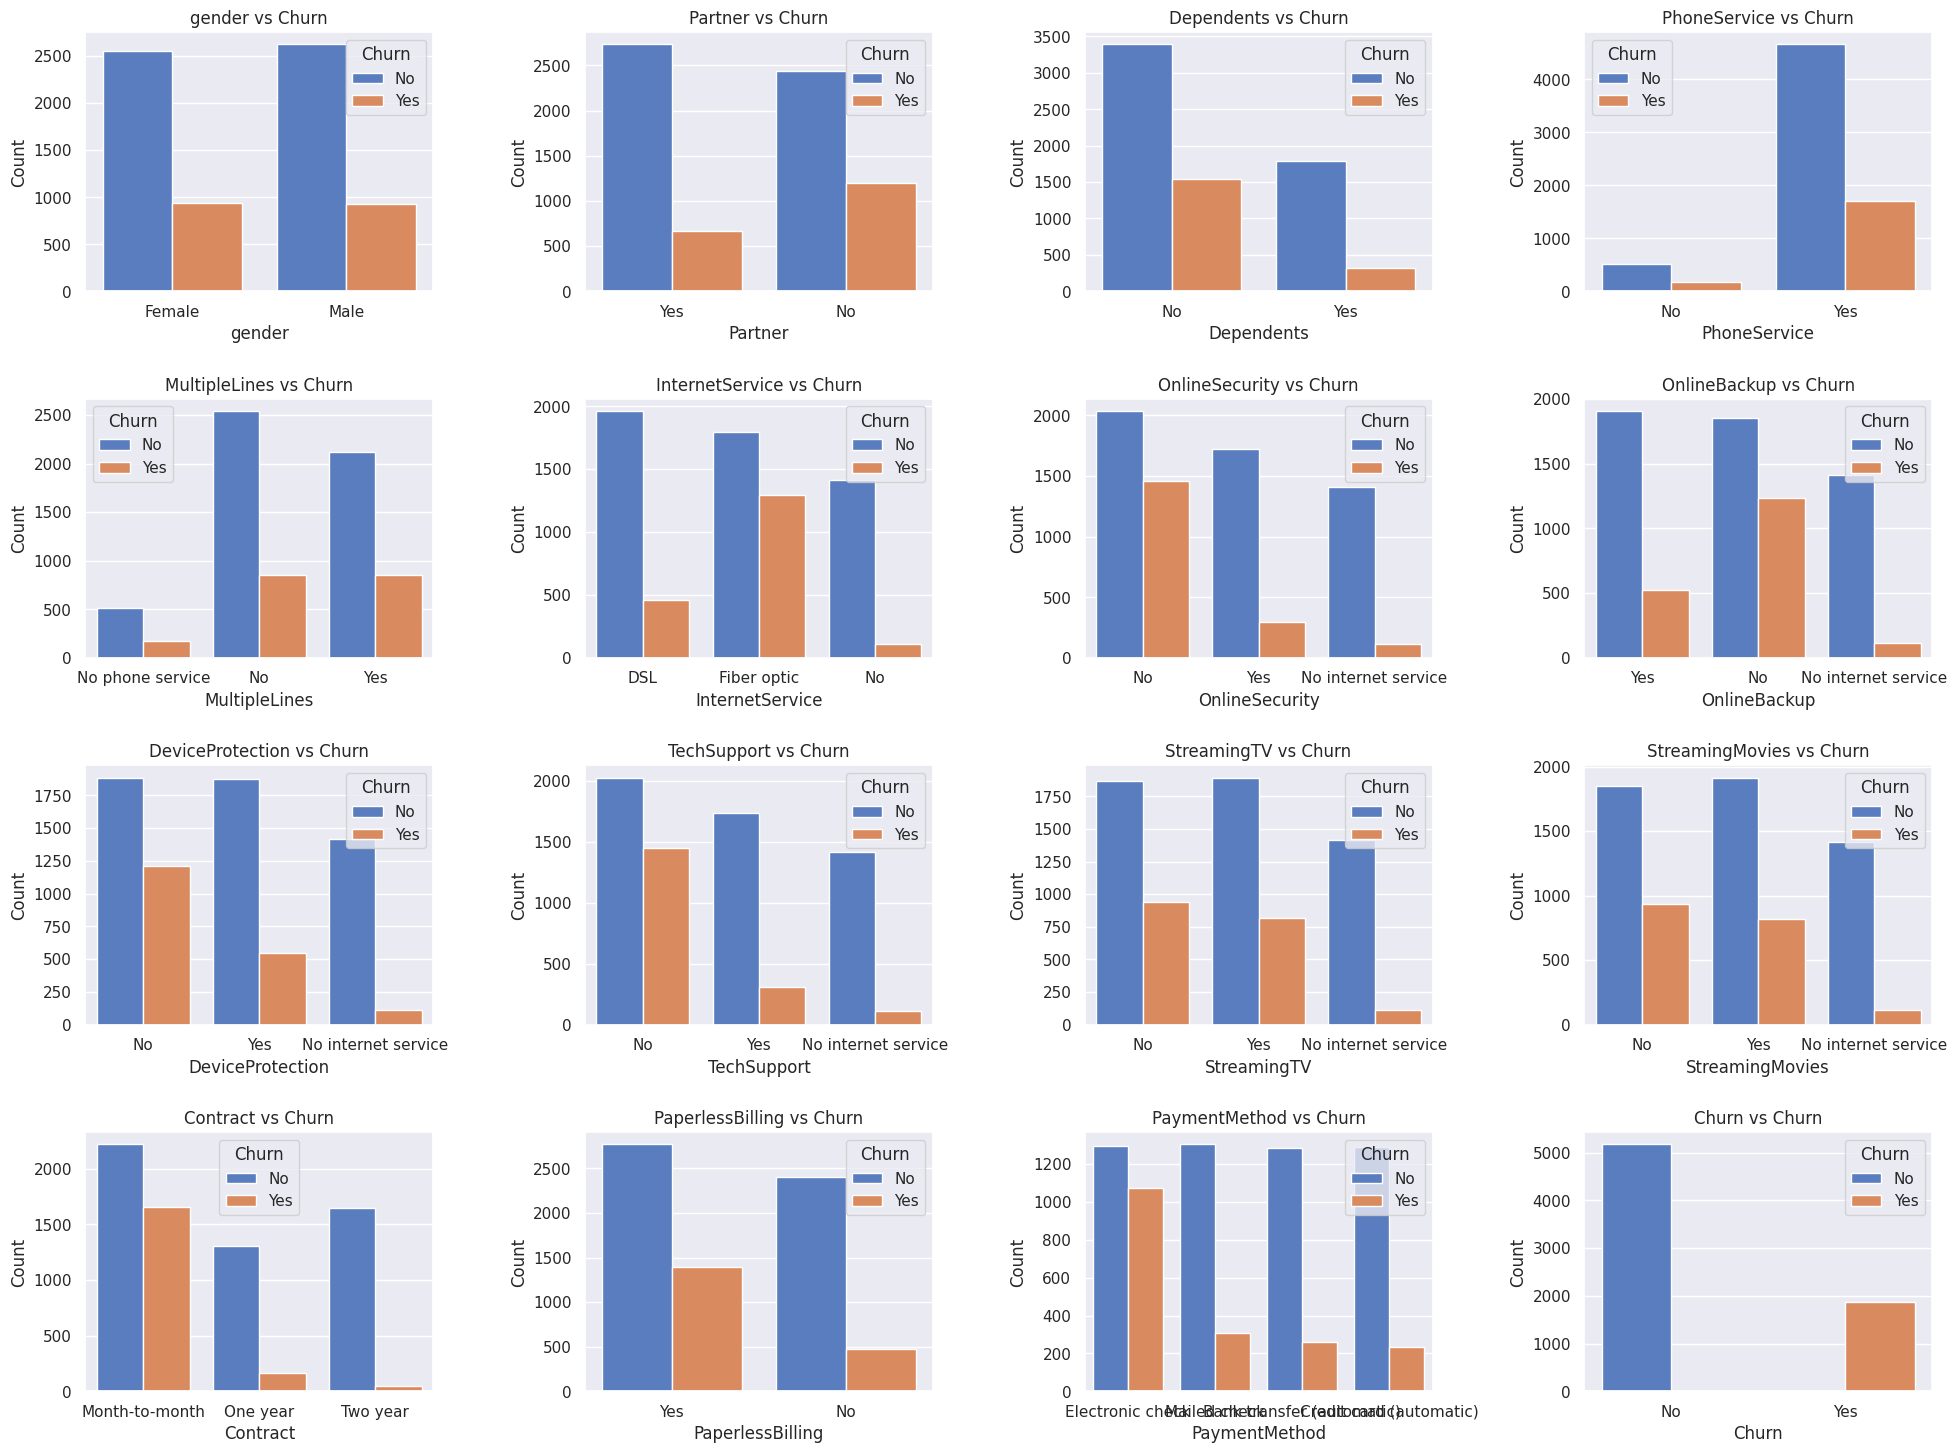

In [34]:
# Define the figure size
sns.set(rc={'figure.figsize':(20,15)})

# Loop over each categorical feature
for i, cat in enumerate(data.select_dtypes(include=['object'])):
    
    # Create a subplot for each feature
    plt.subplot(4, 4, i+1)
    
    # Create a countplot for the feature, color-coded by Churn
    sns.countplot(x=cat, hue='Churn', data=data, palette='muted')
    
    # Set the title and axis labels
    plt.title(f'{cat} vs Churn')
    plt.ylabel('Count')
    
    # Add legend to the plot
    plt.legend(title='Churn', loc='best')
    
    # Set the spacing between subplots
    plt.tight_layout(pad=2)
    
# Show the plot
plt.show()


# 2. Feature Engineering

###2.1. Fixing Data Type

In [35]:
data.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5560,Male,0,Yes,No,61,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,Yes,Month-to-month,No,Credit card (automatic),94.15,5731.85,No


In [36]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

According to dataset above, there is no missfit data types. feature SeniorCitizen is supposed to be in categorical type (True or False), not in numerical type (0 or 1) but we will left it as it is since we will encoding all the feature to numeric for modeling.

###2.2. Handle Missing Values

In [37]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###2.3. Handle Duplicate Values

In [38]:
data.duplicated().sum()

22

###2.4. Feature Selection

###2.5. Handle Outlier

###2.6. Feature Standardization

# 3. Modeling and Evaluation

# 4. Model Interpretation and Recommendation